/tmp/ipykernel_3610472/4024646170.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("../../../models/websam/run_20250207_112031/models/best_model.

None


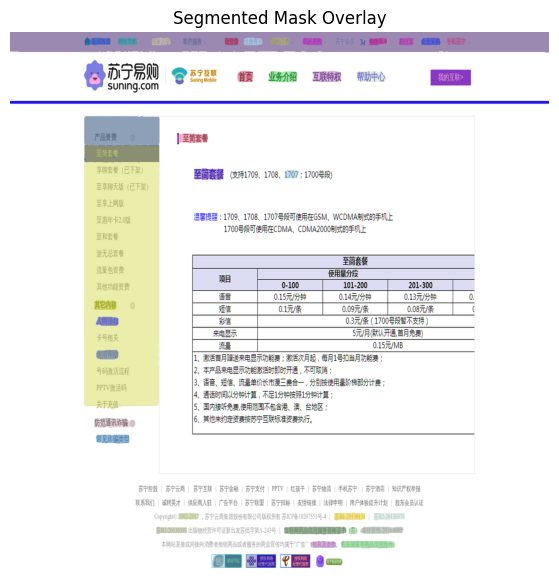

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import build_sam_vit_b
import torch


# Load image
image_path = "../../../data/webis-webseg-20-sam-small/train/images/000004.png"
image = cv2.imread(image_path)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB¨
image = cv2.resize(image, (1024, 1024))  # Resize to 512x512

# default but bigger than the Web-sam paper default: sam = sam_model_registry["general"](checkpoint="../../../models/websam/sam_vit_h_4b8939.pth", strict_weights=False)
#sam = sam_model_registry["vit_b"](checkpoint="../../../models/websam/run_20250207_112031/models/best_model.pth", strict_weights=True)
# Load the checkpoint
checkpoint = torch.load("../../../models/websam/run_20250207_112031/models/best_model.pth")

# Initialize the model first
sam = build_sam_vit_b(
    checkpoint=None,  # Don't load weights here
    strict_weights=True,
    freeze_encoder=True
).cuda()

# Load just the model state dict
sam.load_state_dict(checkpoint['model_state_dict'])

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

# Create an overlay image
overlay = image.copy()
for mask in masks:
    segmentation = mask["segmentation"]
    
    # Generate a random color for the mask
    color = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
    
    # Apply mask overlay
    overlay[segmentation] = (overlay[segmentation] * 0.5 + color * 0.5).astype(np.uint8)

# Display the image with segmentation masks
plt.figure(figsize=(10, 7))
plt.imshow(overlay)
plt.axis("off")
plt.title("Segmented Mask Overlay")
plt.show()

[141.0, 215.0, 142.0, 32.0]
[799.0, 71.0, 76.0, 30.0]
[141.0, 160.0, 142.0, 556.0]
[350.0, 259.0, 55.0, 21.0]
[0.0, 0.0, 1023.0, 38.0]
[408.0, 993.0, 31.0, 24.0]
[659.0, 74.0, 53.0, 20.0]
[556.0, 11.0, 36.0, 13.0]
[575.0, 74.0, 54.0, 20.0]
[408.0, 11.0, 25.0, 13.0]
[469.0, 993.0, 35.0, 24.0]
[444.0, 11.0, 36.0, 13.0]
[781.0, 11.0, 36.0, 13.0]
[141.0, 54.0, 40.0, 56.0]
[205.0, 11.0, 36.0, 13.0]
[534.0, 993.0, 36.0, 24.0]
[618.0, 11.0, 36.0, 14.0]
[328.0, 11.0, 35.0, 14.0]
[495.0, 11.0, 34.0, 13.0]
[739.0, 11.0, 27.0, 13.0]
[160.0, 510.0, 41.0, 17.0]
[666.0, 940.0, 80.0, 12.0]
[582.0, 994.0, 14.0, 22.0]
[432.0, 73.0, 29.0, 22.0]
[491.0, 74.0, 53.0, 20.0]
[385.0, 994.0, 20.0, 23.0]
[571.0, 967.0, 49.0, 12.0]
[600.0, 1000.0, 31.0, 12.0]
[830.0, 11.0, 35.0, 13.0]
[141.0, 160.0, 142.0, 83.0]
[318.0, 193.0, 57.0, 17.0]
[163.0, 765.0, 63.0, 16.0]
[629.0, 967.0, 101.0, 13.0]
[691.0, 914.0, 58.0, 13.0]
[142.0, 11.0, 48.0, 13.0]
[269.0, 11.0, 35.0, 13.0]
[163.0, 541.0, 42.0, 16.0]
[644.0, 940.0, 

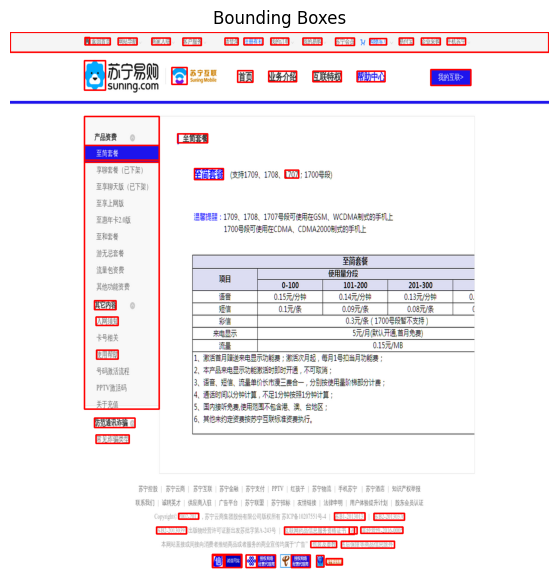

In [18]:
# Draw bounding boxes on the image
image_with_bboxes = image.copy()
for mask in masks:
    x, y, w, h = map(int, mask["bbox"])  # Convert coordinates to integers
    print(mask["bbox"])
    cv2.rectangle(image_with_bboxes, 
                 (x, y),               # Top-left corner
                 (x + w, y + h),       # Bottom-right corner
                 (255, 0, 0),          # Blue color in BGR
                 2)                     # Line thickness

# Display the image with bounding boxes
plt.figure(figsize=(10, 7))
plt.imshow(image_with_bboxes)
plt.axis("off")
plt.title("Bounding Boxes")
plt.show()